In [1]:
# Import sys, then tell python where to find the nEXO-specific classes
import sys
sys.path.append('../../../modules')

In [2]:
# Import useful libraries for analysis

import pandas as pd
import hist
from hist import Hist
import numpy as np
from matplotlib import pyplot as plt
import os
from pathlib import Path 

plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = (10,8)

from cycler import cycler
plt.rcParams['axes.prop_cycle'] = cycler(color='bgrcmyk')

In [3]:
# Import the nEXO sensitivity classes

import nEXOFitWorkspace
import nEXOFitModel
import nEXOFitLikelihood

In [4]:
tag_dnn_dict={'800AAD':'0.0', 'EBF57F':'0.15', '83BAFF':'0.2', 'F4CBD6':'0.25'}

In [5]:
outputdir = Path('/p/lustre2/nexouser/samuele/multivarstudy/output')

import glob
h5_files = glob.glob(f'{outputdir}/*.h5')

dfdict = dict()
for tag in tag_dnn_dict.keys():
    print(f'Loading data for tag {tag}')
    df_list = [pd.read_hdf(outputdir/Path(filename)) for filename in h5_files if tag in filename]
    dfdict[tag] = pd.concat(df_list, ignore_index=True)
    print('---> Loaded {} toy datasets'.format(len(dfdict[tag])))


Loading data for tag 800AAD
---> Loaded 5000 toy datasets
Loading data for tag EBF57F
---> Loaded 5000 toy datasets
Loading data for tag 83BAFF
---> Loaded 5000 toy datasets
Loading data for tag F4CBD6
---> Loaded 5000 toy datasets


In [6]:
df = dfdict['EBF57F']
df.head()

,num_signal,lambda,fixed_fit_converged,fixed_fit_acc_covar,90CL_crossing,num_iterations,best_fit_converged,best_fit_covar,best_fit_iterations,best_fit_parameters,best_fit_errors,best_fit_nll,fixed_fit_parameters,fixed_fit_errors,input_parameters
0,"[1e-06, 1.4000009999999998, 2.800001, 4.200000...","[5.2137080450265216e-05, 1.1236100236646749, 2...","[True, True, True, True, True, True, True, Tru...","[True, True, True, True, True, True, True, Tru...",3.290329,"[2.0, 1.0, 1.0, 1.0, 1.0, 5.0, 3.0, 1.0, 1.0, ...",True,True,1,"{'Num_Far': 5434.479457904304, 'Num_Vessel_U23...","{513.5034978875342: 513.5034978875342, 713.204...",-4.217485,"{'Num_Far': 5457.198466984231, 'Num_Vessel_U23...","{455.7569122530658: 455.7569122530658, 1010.46...","[5512.894290842072, 840.7484208702666, 259.766..."
1,"[1e-06, 1.4000009999999998, 2.800001, 4.200000...","[2.121764047174434, 1.1191463367368435, 0.5170...","[True, True, True, True, True, True, True, Tru...","[True, True, True, True, True, True, True, Tru...",17.311731,"[1.0, 1.0, 1.0, 3.0, 2.0, 1.0, 1.0, 1.0, 1.0, ...",True,True,1,"{'Num_Far': 5093.436093937176, 'Num_Vessel_U23...","{467.07032552022383: 467.07032552022383, 11181...",-5.291287,"{'Num_Far': 5080.888446950185, 'Num_Vessel_U23...","{1795.0285099351718: 1795.0285099351718, 12580...","[5645.795888459387, 3031.8962731471347, 642.80..."
2,"[1e-06, 1.4000009999999998, 2.800001, 4.200000...","[1.9837720096292362, 0.07203676899642986, 0.10...","[True, True, True, True, True, True, True, Tru...","[True, True, True, True, True, True, True, Tru...",7.760776,"[3.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1.0, ...",True,True,2,"{'Num_Far': 5105.205313060828, 'Num_Vessel_U23...","{266.85239169417946: 266.85239169417946, 645.3...",-4.700549,"{'Num_Far': 5106.675083276464, 'Num_Vessel_U23...","{610.126448869978: 610.126448869978, 1481.7434...","[5661.075724708782, 1023.1906367339307, 551.47..."
3,"[1e-06, 1.4000009999999998, 2.800001, 4.200000...","[2.6153270393791672e-06, 0.5848675498885907, 1...","[True, True, True, True, True, True, True, Tru...","[True, True, True, True, True, True, True, Tru...",5.650565,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 4.0, 2.0, 3.0, ...",True,True,1,"{'Num_Far': 3284.946606990379, 'Num_Vessel_U23...","{840.0935517387279: 840.0935517387279, 1248.78...",-5.961176,"{'Num_Far': 3289.2342006992703, 'Num_Vessel_U2...","{663.1329537645252: 663.1329537645252, 1115.42...","[4260.805441903569, 888.9746534640293, 1243.79..."
4,"[1e-06, 1.4000009999999998, 2.800001, 4.200000...","[8.417105597935404e-05, 1.0372865186498998, 2....","[True, True, True, True, True, True, True, Tru...","[True, True, True, True, True, True, True, Tru...",3.600360,"[1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, ...",True,True,1,"{'Num_Far': 6470.9457972462405, 'Num_Vessel_U2...","{886.4149116646322: 886.4149116646322, 13444.2...",-6.438485,"{'Num_Far': 6491.291364093635, 'Num_Vessel_U23...","{477.6432147379651: 477.6432147379651, 11811.9...","[5889.895943584261, 1121.2340137408082, 1559.8..."


In [7]:
print("Number of Toys:", len(df))

Number of Toys: 5000


In [8]:
# Compute the convergence fraction
good_fit_mask_dict = {}
for tag, df in dfdict.items():
    good_fit_mask = []
    for index,row in df.iterrows():
        if np.sum(row['fixed_fit_acc_covar']) < len(row['fixed_fit_acc_covar'])-2 \
            or not row['best_fit_covar'] \
            or row['90CL_crossing'] < 0.01\
            or row['best_fit_nll'] > 0.:
            good_fit_mask.append(False)
        else:
            good_fit_mask.append(True)
    print(f'Tag {tag} convergence fraction: {np.sum(good_fit_mask)/len(df):3.3}')
    good_fit_mask_dict[tag] = good_fit_mask

Tag 800AAD convergence fraction: 0.994
Tag EBF57F convergence fraction: 0.994
Tag 83BAFF convergence fraction: 0.993
Tag F4CBD6 convergence fraction: 0.995


In [9]:
def ComputeHalflifeFromNumCounts( counts, enrichment_fraction=0.9 ):
    '''Returns the half life which would give (on average) the input number of signal counts'''
    
    N_A = 6.02e23 # atoms/mol
    FidMass = 3281 # kg
    AtomicMass = 135.8 # g/mol
    SigEfficiency = 0.96
    Livetime = 10 # years
    return FidMass*1.e3 / AtomicMass * N_A * enrichment_fraction * Livetime * \
            SigEfficiency * np.log(2) / counts


800AAD - DNN smear: 0.0
   Median 90%CL on signal counts: 6.195619561956196
   Sensitivity: 1.406e+28 years
EBF57F - DNN smear: 0.15
   Median 90%CL on signal counts: 6.630663066306631
   Sensitivity: 1.314e+28 years
83BAFF - DNN smear: 0.2
   Median 90%CL on signal counts: 7.305730573057306
   Sensitivity: 1.192e+28 years
F4CBD6 - DNN smear: 0.25
   Median 90%CL on signal counts: 8.540854085408542
   Sensitivity: 1.020e+28 years


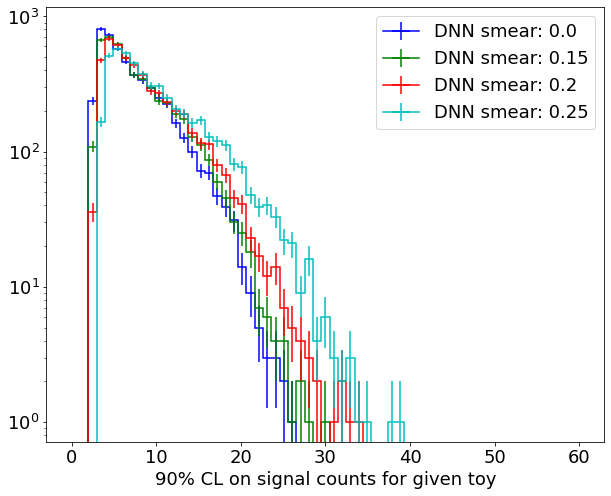

In [10]:
median_dict = {}
sens_dict = {}
fig, ax = plt.subplots()
for tag, df in dfdict.items():
    h = Hist.new.Regular(61, 0, 60, name="signal_counts").Double()
    values = df['90CL_crossing'].loc[good_fit_mask_dict[tag]]
    h.fill(values)
    median = np.median(values)
    median_dict[tag] = median
    sens_dict[tag] = ComputeHalflifeFromNumCounts(median)
    print(f'{tag} - DNN smear: {tag_dnn_dict[tag]}')
    print(f'   Median 90%CL on signal counts: {median}')
    print(f'   Sensitivity: {sens_dict[tag]:.3e} years')

    h.plot1d(ax=ax, label=f'DNN smear: {tag_dnn_dict[tag]}')

plt.legend()
plt.xlabel('90% CL on signal counts for given toy')
plt.yscale('log')

dnn_smear	sens	rel sens change
0.0 	 1.406e+28 	 1.000
0.15 	 1.314e+28 	 0.934
0.2 	 1.192e+28 	 0.848
0.25 	 1.020e+28 	 0.725


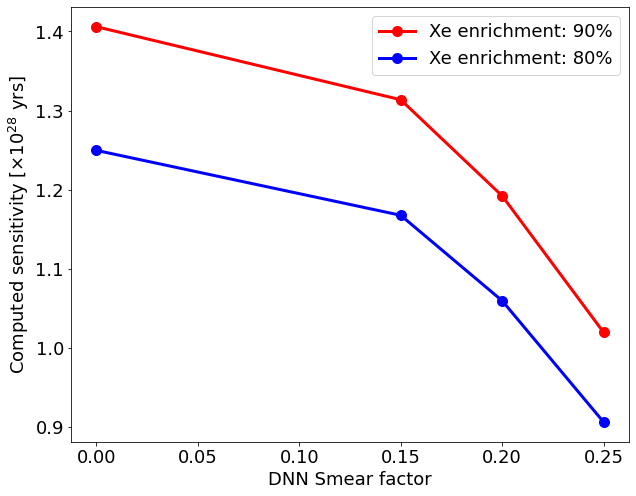

In [16]:
x_points = np.array(list(tag_dnn_dict.values()), dtype=float)
y_points = np.array(list(sens_dict.values()), dtype=float)
r_points = median_dict['800AAD']/np.array(list(median_dict.values()))

    
plt.plot(x_points, y_points/1.e28,'-or', markersize=10, linewidth=3, label="Xe enrichment: 90%")
plt.plot(x_points, y_points/0.9*0.8/1.e28,'-ob', markersize=10, linewidth=3, label="Xe enrichment: 80%")
# plt.xscale('log')
# plt.ylim(0.2,1.2)
plt.ylabel(r'Computed sensitivity [$\times 10^{28}$ yrs]')
plt.xlabel('DNN Smear factor')
plt.legend()

# plt.savefig('sensitivity_vs_dnn_smear.png', dpi=200, bbox_inches='tight')

print('dnn_smear\tsens\trel sens change')
for x, y, r in zip(x_points, y_points, r_points):
    print(x, "\t", f'{y:.3e}', "\t", f'{r:.3f}')